In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
import time
from sklearn.metrics import classification_report

In [2]:
DataDipakai = pd.read_csv("/content/sentiment_prabowo&gibran.csv")
DataDipakai

,text,quote,reply,retweet,favorit,lang,user_id,conversation_id,username,url
0,@gibran_tweet Yakin mau dukung CAWAPRES BONEKA...,0,0,0,0,in,1.190000e+18,1.720000e+18,msobri99,https://twitter.com/msobri99/status/1722660458...
1,@Melihat_Indo Membuat masyarakat ikut sedih de...,0,0,0,0,in,1.640000e+18,1.720000e+18,Kulsum921,https://twitter.com/Kulsum921/status/172266006...
2,@Melihat_Indo Cacat hukum Jelas ! Demokrasi sd...,0,0,0,0,in,1.350000e+18,1.720000e+18,FaktaNKRI72,https://twitter.com/FaktaNKRI72/status/1722659...
3,@Gus_Raharjo Dari awal sudah tumpuk tumpuk nih...,0,0,0,0,in,1.560000e+18,1.720000e+18,siviargh,https://twitter.com/siviargh/status/1722659599...
4,@Melihat_Indo Membuat merasa dibohongi semoga ...,0,0,0,0,in,1.650000e+18,1.720000e+18,DanisaRahm,https://twitter.com/DanisaRahm/status/17226595...
...,...,...,...,...,...,...,...,...,...,...
499,Sebelum mencalonkan diri sebagai wakil preside...,0,0,0,0,in,1.700000e+18,1.720000e+18,slonber,https://twitter.com/slonber/status/17226360749...
500,Gibran Tetap Jadi Cawapres meski Anwar Usman D...,0,0,0,0,in,1.650000e+18,1.720000e+18,MuzakkirIs47884,https://twitter.com/MuzakkirIs47884/status/172...
501,Gibran meski usia belum cukup tapi kursi cawap...,0,0,0,0,in,1.700000e+18,1.720000e+18,sinta_menyenk,https://twitter.com/sinta_menyenk/status/17226...
502,Gibran meski usia belum cukup tapi kursi cawap...,0,0,0,0,in,1.700000e+18,1.720000e+18,Diahcantiksan,https://twitter.com/Diahcantiksan/status/17226...


In [4]:
Data = pd.read_csv("/content/sentiment_prabowo&gibran.csv")
Data

,text,quote,reply,retweet,favorit,lang,user_id,conversation_id,username,url
0,@gibran_tweet Yakin mau dukung CAWAPRES BONEKA...,0,0,0,0,in,1.190000e+18,1.720000e+18,msobri99,https://twitter.com/msobri99/status/1722660458...
1,@Melihat_Indo Membuat masyarakat ikut sedih de...,0,0,0,0,in,1.640000e+18,1.720000e+18,Kulsum921,https://twitter.com/Kulsum921/status/172266006...
2,@Melihat_Indo Cacat hukum Jelas ! Demokrasi sd...,0,0,0,0,in,1.350000e+18,1.720000e+18,FaktaNKRI72,https://twitter.com/FaktaNKRI72/status/1722659...
3,@Gus_Raharjo Dari awal sudah tumpuk tumpuk nih...,0,0,0,0,in,1.560000e+18,1.720000e+18,siviargh,https://twitter.com/siviargh/status/1722659599...
4,@Melihat_Indo Membuat merasa dibohongi semoga ...,0,0,0,0,in,1.650000e+18,1.720000e+18,DanisaRahm,https://twitter.com/DanisaRahm/status/17226595...
...,...,...,...,...,...,...,...,...,...,...
499,Sebelum mencalonkan diri sebagai wakil preside...,0,0,0,0,in,1.700000e+18,1.720000e+18,slonber,https://twitter.com/slonber/status/17226360749...
500,Gibran Tetap Jadi Cawapres meski Anwar Usman D...,0,0,0,0,in,1.650000e+18,1.720000e+18,MuzakkirIs47884,https://twitter.com/MuzakkirIs47884/status/172...
501,Gibran meski usia belum cukup tapi kursi cawap...,0,0,0,0,in,1.700000e+18,1.720000e+18,sinta_menyenk,https://twitter.com/sinta_menyenk/status/17226...
502,Gibran meski usia belum cukup tapi kursi cawap...,0,0,0,0,in,1.700000e+18,1.720000e+18,Diahcantiksan,https://twitter.com/Diahcantiksan/status/17226...


In [5]:
Data.drop_duplicates()

,text,quote,reply,retweet,favorit,lang,user_id,conversation_id,username,url
0,@gibran_tweet Yakin mau dukung CAWAPRES BONEKA...,0,0,0,0,in,1.190000e+18,1.720000e+18,msobri99,https://twitter.com/msobri99/status/1722660458...
1,@Melihat_Indo Membuat masyarakat ikut sedih de...,0,0,0,0,in,1.640000e+18,1.720000e+18,Kulsum921,https://twitter.com/Kulsum921/status/172266006...
2,@Melihat_Indo Cacat hukum Jelas ! Demokrasi sd...,0,0,0,0,in,1.350000e+18,1.720000e+18,FaktaNKRI72,https://twitter.com/FaktaNKRI72/status/1722659...
3,@Gus_Raharjo Dari awal sudah tumpuk tumpuk nih...,0,0,0,0,in,1.560000e+18,1.720000e+18,siviargh,https://twitter.com/siviargh/status/1722659599...
4,@Melihat_Indo Membuat merasa dibohongi semoga ...,0,0,0,0,in,1.650000e+18,1.720000e+18,DanisaRahm,https://twitter.com/DanisaRahm/status/17226595...
...,...,...,...,...,...,...,...,...,...,...
499,Sebelum mencalonkan diri sebagai wakil preside...,0,0,0,0,in,1.700000e+18,1.720000e+18,slonber,https://twitter.com/slonber/status/17226360749...
500,Gibran Tetap Jadi Cawapres meski Anwar Usman D...,0,0,0,0,in,1.650000e+18,1.720000e+18,MuzakkirIs47884,https://twitter.com/MuzakkirIs47884/status/172...
501,Gibran meski usia belum cukup tapi kursi cawap...,0,0,0,0,in,1.700000e+18,1.720000e+18,sinta_menyenk,https://twitter.com/sinta_menyenk/status/17226...
502,Gibran meski usia belum cukup tapi kursi cawap...,0,0,0,0,in,1.700000e+18,1.720000e+18,Diahcantiksan,https://twitter.com/Diahcantiksan/status/17226...


In [6]:
import re
def preprocess(sentence):
  sentence = sentence.lower()
  sentence = re.sub('@[^\s]+','',sentence)
  sentence = re.sub('http[^\s]+','',sentence)
  sentence = re.sub(r'[^a-zA-Z]+',' ',sentence)
  return sentence

Data['text_clean'] = Data['text'].apply(lambda x: preprocess(x))
Data.head(10)

,text,quote,reply,retweet,favorit,lang,user_id,conversation_id,username,url,text_clean
0,@gibran_tweet Yakin mau dukung CAWAPRES BONEKA...,0,0,0,0,in,1.190000e+18,1.720000e+18,msobri99,https://twitter.com/msobri99/status/1722660458...,yakin mau dukung cawapres boneka
1,@Melihat_Indo Membuat masyarakat ikut sedih de...,0,0,0,0,in,1.640000e+18,1.720000e+18,Kulsum921,https://twitter.com/Kulsum921/status/172266006...,membuat masyarakat ikut sedih dengan ini semu...
2,@Melihat_Indo Cacat hukum Jelas ! Demokrasi sd...,0,0,0,0,in,1.350000e+18,1.720000e+18,FaktaNKRI72,https://twitter.com/FaktaNKRI72/status/1722659...,cacat hukum jelas demokrasi sdh ternodai oleh...
3,@Gus_Raharjo Dari awal sudah tumpuk tumpuk nih...,0,0,0,0,in,1.560000e+18,1.720000e+18,siviargh,https://twitter.com/siviargh/status/1722659599...,dari awal sudah tumpuk tumpuk nih masalahnya ...
4,@Melihat_Indo Membuat merasa dibohongi semoga ...,0,0,0,0,in,1.650000e+18,1.720000e+18,DanisaRahm,https://twitter.com/DanisaRahm/status/17226595...,membuat merasa dibohongi semoga tidak ada lag...
5,@Melihat_Indo Jangan sampai kedekatan nya seka...,0,0,0,0,in,1.560000e+18,1.720000e+18,siviargh,https://twitter.com/siviargh/status/1722659429...,jangan sampai kedekatan nya sekarang cuman di...
6,@Gus_Raharjo Gibran Cawapres Boneka Utk seora...,0,0,0,0,in,1.350000e+18,1.720000e+18,FaktaNKRI72,https://twitter.com/FaktaNKRI72/status/1722659...,gibran cawapres boneka utk seorang yg blm ber...
7,@ernestprakasa Kalo terkait mas Gibran no kome...,0,0,0,0,in,4.468079e+09,1.720000e+18,chrysaanths,https://twitter.com/chrysaanths/status/1722659...,kalo terkait mas gibran no komen dulu balik l...
8,Gibran Cawapres Boneka https://t.co/NJqI7PAH8h,0,0,0,1,in,1.700000e+18,1.720000e+18,adisetiiyono77,https://twitter.com/adisetiiyono77/status/1722...,gibran cawapres boneka
9,@Melihat_Indo Semoga tidak ada lagi kesalahan2...,0,0,0,0,in,1.700000e+18,1.720000e+18,sekarh340,https://twitter.com/sekarh340/status/172265876...,semoga tidak ada lagi kesalahan yang terjadi ...


In [7]:
import pandas as pd
from textblob import TextBlob

# Analisis sentimen menggunakan TextBlob
def analyze_sentiment(tweet):
    analysis = TextBlob(tweet)
    # Label sentimen berdasarkan polaritas
    if analysis.sentiment.polarity > 0:
        return 'Positif'
    else:
        return 'Negatif'

# Tambahkan kolom sentimen ke dataframe
Data['label'] = Data['text_clean'].apply(analyze_sentiment)

# Tampilkan dataframe hasil
Data

,text,quote,reply,retweet,favorit,lang,user_id,conversation_id,username,url,text_clean,label
0,@gibran_tweet Yakin mau dukung CAWAPRES BONEKA...,0,0,0,0,in,1.190000e+18,1.720000e+18,msobri99,https://twitter.com/msobri99/status/1722660458...,yakin mau dukung cawapres boneka,Negatif
1,@Melihat_Indo Membuat masyarakat ikut sedih de...,0,0,0,0,in,1.640000e+18,1.720000e+18,Kulsum921,https://twitter.com/Kulsum921/status/172266006...,membuat masyarakat ikut sedih dengan ini semu...,Negatif
2,@Melihat_Indo Cacat hukum Jelas ! Demokrasi sd...,0,0,0,0,in,1.350000e+18,1.720000e+18,FaktaNKRI72,https://twitter.com/FaktaNKRI72/status/1722659...,cacat hukum jelas demokrasi sdh ternodai oleh...,Negatif
3,@Gus_Raharjo Dari awal sudah tumpuk tumpuk nih...,0,0,0,0,in,1.560000e+18,1.720000e+18,siviargh,https://twitter.com/siviargh/status/1722659599...,dari awal sudah tumpuk tumpuk nih masalahnya ...,Negatif
4,@Melihat_Indo Membuat merasa dibohongi semoga ...,0,0,0,0,in,1.650000e+18,1.720000e+18,DanisaRahm,https://twitter.com/DanisaRahm/status/17226595...,membuat merasa dibohongi semoga tidak ada lag...,Negatif
...,...,...,...,...,...,...,...,...,...,...,...,...
499,Sebelum mencalonkan diri sebagai wakil preside...,0,0,0,0,in,1.700000e+18,1.720000e+18,slonber,https://twitter.com/slonber/status/17226360749...,sebelum mencalonkan diri sebagai wakil preside...,Negatif
500,Gibran Tetap Jadi Cawapres meski Anwar Usman D...,0,0,0,0,in,1.650000e+18,1.720000e+18,MuzakkirIs47884,https://twitter.com/MuzakkirIs47884/status/172...,gibran tetap jadi cawapres meski anwar usman d...,Negatif
501,Gibran meski usia belum cukup tapi kursi cawap...,0,0,0,0,in,1.700000e+18,1.720000e+18,sinta_menyenk,https://twitter.com/sinta_menyenk/status/17226...,gibran meski usia belum cukup tapi kursi cawap...,Negatif
502,Gibran meski usia belum cukup tapi kursi cawap...,0,0,0,0,in,1.700000e+18,1.720000e+18,Diahcantiksan,https://twitter.com/Diahcantiksan/status/17226...,gibran meski usia belum cukup tapi kursi cawap...,Negatif


In [8]:
Data.to_csv("Data_bersih.csv")

In [11]:
dataBersih = pd.read_csv("/content/Data_bersih.csv")
dataDipakai = dataBersih[["text","text_clean","label"]]
dataDipakai

,text,text_clean,label
0,@gibran_tweet Yakin mau dukung CAWAPRES BONEKA...,yakin mau dukung cawapres boneka,Negatif
1,@Melihat_Indo Membuat masyarakat ikut sedih de...,membuat masyarakat ikut sedih dengan ini semu...,Negatif
2,@Melihat_Indo Cacat hukum Jelas ! Demokrasi sd...,cacat hukum jelas demokrasi sdh ternodai oleh...,Negatif
3,@Gus_Raharjo Dari awal sudah tumpuk tumpuk nih...,dari awal sudah tumpuk tumpuk nih masalahnya ...,Negatif
4,@Melihat_Indo Membuat merasa dibohongi semoga ...,membuat merasa dibohongi semoga tidak ada lag...,Negatif
...,...,...,...
499,Sebelum mencalonkan diri sebagai wakil preside...,sebelum mencalonkan diri sebagai wakil preside...,Negatif
500,Gibran Tetap Jadi Cawapres meski Anwar Usman D...,gibran tetap jadi cawapres meski anwar usman d...,Negatif
501,Gibran meski usia belum cukup tapi kursi cawap...,gibran meski usia belum cukup tapi kursi cawap...,Negatif
502,Gibran meski usia belum cukup tapi kursi cawap...,gibran meski usia belum cukup tapi kursi cawap...,Negatif


In [12]:
# Menyimpan DataFrame ke dalam file CSV
dataDipakai.to_csv("/content/Data_Jadi.csv", index=False)

In [14]:
from sklearn.model_selection import train_test_split

# Assuming Data_Jadi is your DataFrame
dataTrain, dataTest = train_test_split(dataDipakai, test_size=0.3, random_state=100)

# Resetting index for both sets
dataTrain.reset_index(drop=True, inplace=True)
dataTest.reset_index(drop=True, inplace=True)

# Selecting relevant columns
dataTrainDipakai = dataTrain[["text", "text_clean", "label"]]
dataTestDipakai = dataTest[["text", "text_clean", "label"]]

dataTrainDipakai

,text,text_clean,label
0,@jokowi @gibran_tweet @kaesangp Capres @ganj...,capres menguatkan hati ketua bem ui melki sed...,Negatif
1,#AniesMuhaimin2024 VIP 6jt Gibran Cawapres Ile...,aniesmuhaimin vip jt gibran cawapres ilegal t...,Negatif
2,Cawapres Boneka Ahok Sebut Gibran Belum Berpen...,cawapres boneka ahok sebut gibran belum berpen...,Negatif
3,Konten yang dibuat komika @bintangemon berisi ...,konten yang dibuat komika berisi sindiran pada...,Negatif
4,#AniesMuhaimin2024 VIP 6jt Gibran Cawapres Ile...,aniesmuhaimin vip jt gibran cawapres ilegal t...,Negatif
...,...,...,...
347,@Melihat_Indo Gibran Cawapres Boneka yg lahir ...,gibran cawapres boneka yg lahir dr mahkamah k...,Negatif
348,Gibran di puncak tanpa prestasi #PAMANGUILTY #...,gibran di puncak tanpa prestasi pamanguilty or...,Negatif
349,@DedynurPalakka @ekabudiyasa_ID @a_rachman @gi...,goblok yg kecewa capa dungu klo potongan raim...,Negatif
350,#AniesMuhaimin2024 VIP 6jt Gibran Cawapres Ile...,aniesmuhaimin vip jt gibran cawapres ilegal t...,Negatif


In [15]:
dataTestDipakai

,text,text_clean,label
0,#AniesMuhaimin2024 VIP 6jt Gibran Cawapres Ile...,aniesmuhaimin vip jt gibran cawapres ilegal t...,Negatif
1,#AniesMuhaimin2024 VIP 6jt Gibran Cawapres Ile...,aniesmuhaimin vip jt gibran cawapres ilegal t...,Negatif
2,beda bung saat pilkada solo tidak ada konstitu...,beda bung saat pilkada solo tidak ada konstitu...,Negatif
3,@Gus_Raharjo Lihatlah si Gibran Cawapres Bonek...,lihatlah si gibran cawapres boneka sekadar fi...,Negatif
4,#AniesMuhaimin2024 VIP 6jt Gibran Cawapres Ile...,aniesmuhaimin vip jt gibran cawapres ilegal t...,Negatif
...,...,...,...
147,Gibran Cawapres Boneka https://t.co/ZO6TNiLFrr,gibran cawapres boneka,Negatif
148,#AniesMuhaimin2024 VIP 6jt Gibran Cawapres Ile...,aniesmuhaimin vip jt gibran cawapres ilegal t...,Negatif
149,#AniesMuhaimin2024 VIP 6jt Gibran Cawapres Ile...,aniesmuhaimin vip jt gibran cawapres ilegal t...,Negatif
150,#AniesMuhaimin2024 VIP 6jt Gibran Cawapres Ile...,aniesmuhaimin vip jt gibran cawapres ilegal t...,Negatif


In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming 'text_clean' is the column containing text data in your DataFrame
dataTrain['text_clean'] = dataTrain['text_clean'].fillna('')

# Create feature vectors
vectorizer = TfidfVectorizer(min_df=5, max_df=0.8, sublinear_tf=True, use_idf=True)
train_vectors = vectorizer.fit_transform(dataTrain['text_clean'])


In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
import time

# Assuming you have already defined and fit the TfidfVectorizer as shown in your previous code
vectorizer = TfidfVectorizer(min_df=5, max_df=0.8, sublinear_tf=True, use_idf=True)

# Assuming dataTrain is your training dataset
train_vectors = vectorizer.fit_transform(dataTrain['text_clean'])

# Assuming dataTest is your test dataset
test_vectors = vectorizer.transform(dataTest['text_clean'])

# Now you can proceed with the Naive Bayes classification
classifier_nb = MultinomialNB()
t0 = time.time()
classifier = classifier_nb.fit(train_vectors, dataTrain['label'])
t1 = time.time()
prediction_nb = classifier_nb.predict(test_vectors)
t2 = time.time()
time_nb_train = t1 - t0
time_nb_predict = t2 - t1

# results
print("Training time: %fs; Prediction time: %fs" % (time_nb_train, time_nb_predict))
report = classification_report(dataTest['label'], prediction_nb, output_dict=True)
print('positive: ', report['Positif'])
print('negative: ', report['Negatif'])

Training time: 0.002381s; Prediction time: 0.000274s
positive:  {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 4}
negative:  {'precision': 0.9731543624161074, 'recall': 0.9797297297297297, 'f1-score': 0.9764309764309763, 'support': 148}


In [ ]:
#f1-score = 2 * ((precision * recall)/(precision + recall))

# f1_score = report['weighted avg']['f1-score']

Confusion matrix, without normalization
[[123   0]
 [  3   0]]
Normalized confusion matrix
[[1. 0.]
 [1. 0.]]


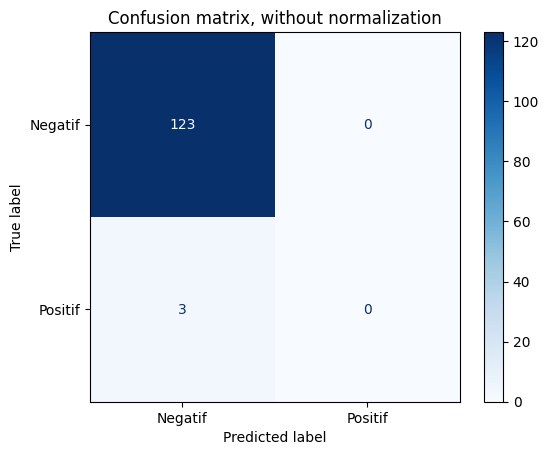

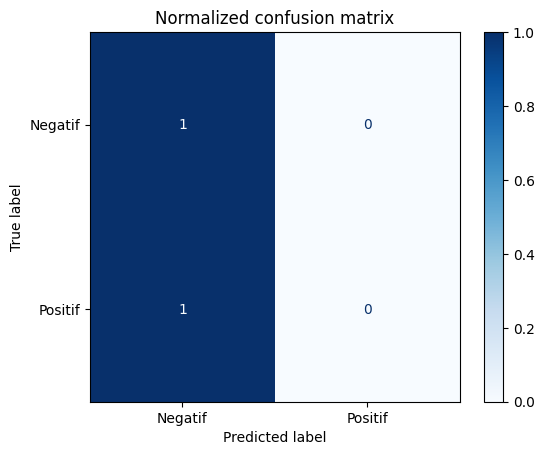

In [18]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

# Assuming dataBersih is your dataset
X_train, X_test, y_train, y_test = train_test_split(dataBersih['text_clean'], dataBersih['label'], random_state=0)

# Fill NaN values with an empty string
X_train = X_train.fillna('')
X_test = X_test.fillna('')

# Create feature vectors
vectorizer = TfidfVectorizer(min_df=5, max_df=0.8, sublinear_tf=True, use_idf=True)
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# Run classifier
classifier_nb = MultinomialNB()
classifier_nb.fit(X_train, y_train)

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        classifier_nb,
        X_test,
        y_test,
        display_labels=None,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

